In [2]:
import csv
import numpy as np
from io import StringIO
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Voice4PD.csv',sep=';',decimal=',',skiprows=1,usecols=[1,2,3,4,5],names=["Classe","Atonie","Debit","Irreg","Puissance"])
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(data.head())

  Classe  Atonie  Debit  Irreg  Puissance
0     HC    2.64   0.73   0.70       0.37
1     HC    0.58   0.55   1.41       1.29
2     HC    1.88   0.73   0.61       1.42
3     HC    0.58   1.53   0.64       1.66
4     HC    1.58   0.73   0.96       0.58


In [5]:
print(data.shape)

(113, 5)


In [6]:
data['Classe']=pd.Categorical(data["Classe"], ordered=False)
print(data.dtypes)

Classe       category
Atonie        float64
Debit         float64
Irreg         float64
Puissance     float64
dtype: object


In [7]:
print(data['Classe'].value_counts())

HC     38
PD     35
MSA    28
PSP    12
Name: Classe, dtype: int64


In [8]:
#print(data.loc[data['Classe']=="MSA",:])

In [9]:

data['Classe']=data['Classe'].cat.rename_categories([0,1,2,3])
""" 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP"""


' 1 pour HC, 2 pour MSA, 3 pour PD, 4 pour PSP'

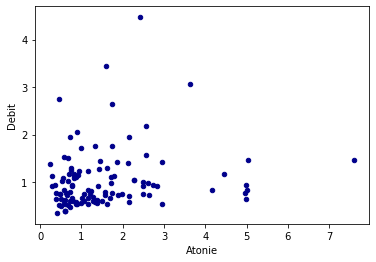

In [10]:
data.plot.scatter(x='Atonie', y='Debit', color='DarkBlue')


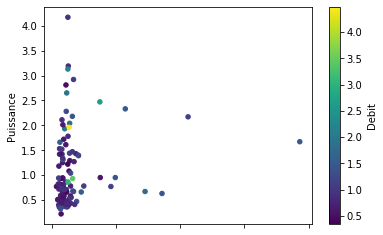

In [11]:
data.plot.scatter(x='Irreg', y='Puissance',c='Debit',colormap='viridis')

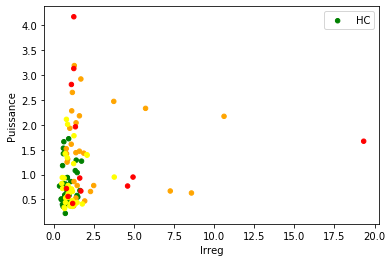

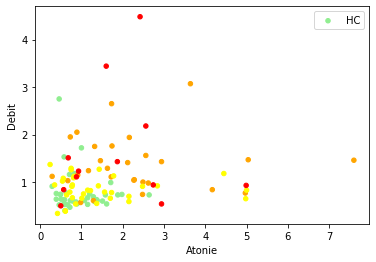

In [12]:
data.plot.scatter(x='Irreg', y='Puissance',
                  c=pd.Series(['green','orange','yellow','red'])[data['Classe']],label='HC')

data.plot.scatter(x='Atonie', y='Debit',
                  c=pd.Series(['LightGreen','orange','yellow','red'])[data['Classe']],label='HC')

In [13]:
data_train,data_test= train_test_split(data, test_size=0.33)

#print(data_train.shape)
#print(data_test.shape)

In [14]:
lda = LinearDiscriminantAnalysis()

x_train=data_train[['Atonie','Debit','Puissance','Irreg']]
x_test=data_test[['Atonie','Debit','Puissance','Irreg']]

classe_test=data_test['Classe']
print(classe_test)

classe_train=data_train['Classe']
print(classe_train)

15     0
103    3
93     2
57     1
37     0
95     2
16     0
102    3
104    3
50     1
77     2
100    2
101    3
97     2
11     0
35     0
13     0
78     2
112    3
39     1
43     1
19     0
8      0
53     1
86     2
52     1
5      0
84     2
64     1
67     2
106    3
75     2
109    3
111    3
70     2
71     2
27     0
98     2
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]
18    0
2     0
47    1
24    0
76    2
     ..
96    2
73    2
69    2
91    2
94    2
Name: Classe, Length: 75, dtype: category
Categories (4, int64): [0, 1, 2, 3]


[0.75722751 0.22179849 0.020974  ]


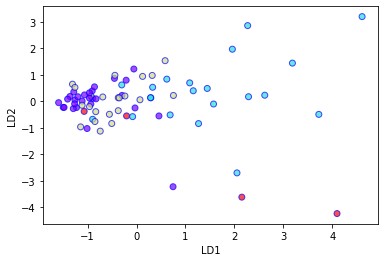

In [15]:
X_lda = lda.fit_transform(x_train, classe_train)
print(lda.explained_variance_ratio_)

#data as a function of the two LDA components
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)


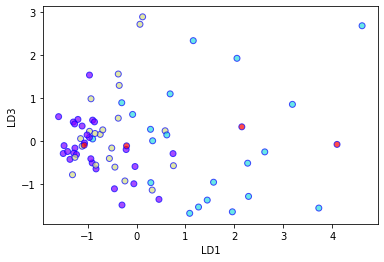

In [16]:
plt.xlabel('LD1')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

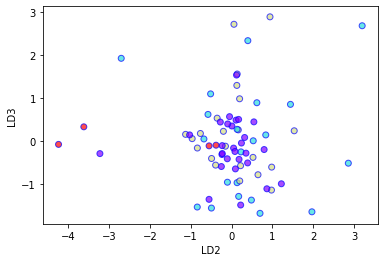

In [17]:
plt.xlabel('LD2')
plt.ylabel('LD3')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=classe_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [18]:
predict_classe=[]
for i in range(x_test.shape[0]):
    predict_classe.append(lda.predict([x_test.iloc[i,:]])[0])

print(predict_classe)
print(classe_test)

[0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0]
15     0
103    3
93     2
57     1
37     0
95     2
16     0
102    3
104    3
50     1
77     2
100    2
101    3
97     2
11     0
35     0
13     0
78     2
112    3
39     1
43     1
19     0
8      0
53     1
86     2
52     1
5      0
84     2
64     1
67     2
106    3
75     2
109    3
111    3
70     2
71     2
27     0
98     2
Name: Classe, dtype: category
Categories (4, int64): [0, 1, 2, 3]


## ACP

In [19]:
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

In [20]:
#transformation – centrage-réduction
data_CR = sc.fit_transform(data[['Atonie','Debit','Irreg','Puissance']])    #on enlève la variable Classe
print(data_CR)

[[ 8.75211539e-01 -4.84592563e-01 -3.97450852e-01 -9.15395869e-01]
 [-7.65140652e-01 -7.69712978e-01 -8.15455433e-02  3.32827564e-01]
 [ 2.70033061e-01 -4.84592563e-01 -4.37495187e-01  5.09206962e-01]
 [-7.65140652e-01  7.82609280e-01 -4.24147075e-01  8.34830467e-01]
 [ 3.11468197e-02 -4.84592563e-01 -2.81767218e-01 -6.30475303e-01]
 [ 3.49661808e-01 -4.68752540e-01  6.52836846e-02  3.05692272e-01]
 [-1.36073549e-01 -6.42992794e-01 -4.41944557e-01 -3.04851798e-01]
 [-6.53660406e-01 -8.96433163e-01 -3.39609035e-01 -4.94798843e-01]
 [-1.28110675e-01 -6.74672840e-01 -3.75203999e-01 -3.18419445e-01]
 [-8.60695148e-01 -8.17233047e-01 -2.46172253e-01 -7.93287055e-01]
 [-3.74959791e-01 -6.74672840e-01 -3.61855888e-01 -4.40528259e-01]
 [-7.49214902e-01 -1.00731332e+00 -3.26260923e-01 -1.42040046e-01]
 [-8.20880775e-01 -6.27152771e-01 -4.06349593e-01 -8.61125285e-01]
 [-5.18291536e-01 -7.85553001e-01 -1.08241767e-01  4.79069979e-02]
 [-6.61623280e-01  1.96528428e-01 -4.15248334e-01 -9.15395869e

In [21]:
#verif que les moyennes sont presques nulles
print(np.mean(data_CR,axis=0))

[-1.86674668e-17  1.93183719e-16 -9.03898392e-17  5.45286530e-17]


In [22]:
#vérif écart-type unitaire
print(np.std(data_CR,axis=0,ddof=0))

[1. 1. 1. 1.]


In [23]:
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


In [24]:
#calculs
coord = acp.fit_transform(data_CR)

#nombre de composantes calculées
print(acp.n_components_) # 4 variables explicatives

4


In [25]:
#valeurs singulières
n=data.shape[0]
print(n)

print(acp.singular_values_**2/n)

113
[1.58820116 0.95586346 0.77325604 0.68267934]


In [26]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

"""la premiere composante concentre 39.7% de l'info,  """

[0.39705029 0.23896586 0.19331401 0.17066984]


"la premiere composante concentre 39.7% de l'info,  "

In [27]:
#val propres corrigées
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.58820116 0.95586346 0.77325604 0.68267934]


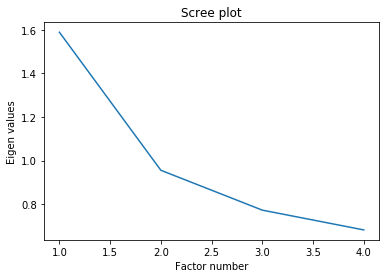

In [28]:
#scree plot: graphique des val propres en fonction des 4 facteurs

p=4    #nb de var explicatives donc ici 4

plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

In [89]:
"""nombre de facteurs a retenir?"""

#calcul seuil
print(np.arange(p,0,-1))

bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
#inversion du vecteur: [1,2,3] devient [3,2,1]
bs = bs[::-1]
print(bs)

[4 3 2 1]
[2.08333333 1.08333333 0.58333333 0.25      ]


In [40]:
#test des bâtons brisés

print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

"""on compare la valeur propre au seuilet on ne garde normalement que les composantes 
pour lesquelles le seuil est inferieurs a la vp"""

   Val.Propre    Seuils
0    1.588201  2.083333
1    0.955863  1.083333
2    0.773256  0.583333
3    0.682679  0.250000


'on compare la valeur propre au seuil et on ne garde normalement que les composantes pour lesquelles le seuil est inferieurs a la vp'

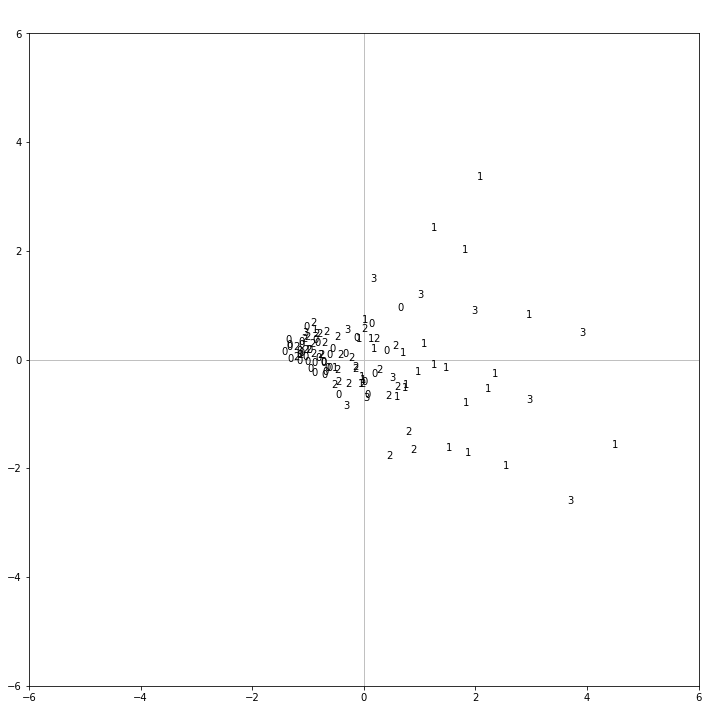

In [76]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)  
axes.set_ylim(-6,6)    

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(data['Classe'][i],(coord[i,0],coord[i,1]))
    
#ajout des axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

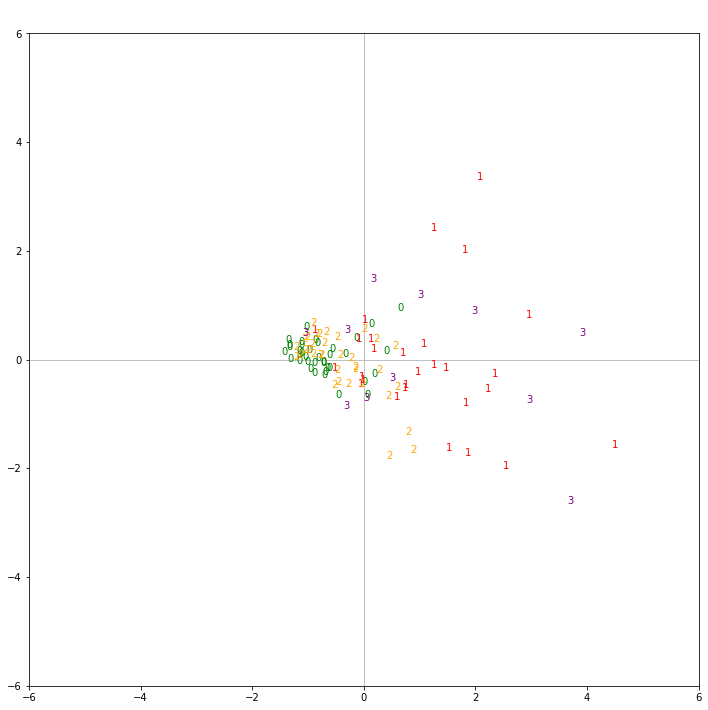

In [87]:
#graphique en coloriant les points

couleur=['green','red','orange','purple']
modalites=['0','1','2','3']

fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    
    #numéro des individus concernés
    mod=int(modalites[c])
    numero = np.where(data['Classe'] == mod)
    
    #les passer en revue pour affichage
    for i in numero[0]: 
        plt.annotate(data['Classe'][i],(coord[i,0],coord[i,1]),color=couleur[c])
            
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

In [88]:
np.where(data['Classe']==1)

(array([38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),)